In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Loading

In [2]:
path = os.getcwd()
print(path)
dir_path = os.path.join(path, "flower_photos")
print(dir_path)

C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning
C:\Users\Mustafa Hasnain\Desktop\Udacity Introduction to TensorFlow- Deep Learning\flower_photos


or

In [3]:
#_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#zip_file = tf.keras.utils.get_file(origin=_URL, fname="flower_photos.tgz",extract=True)

#base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

The dataset we downloaded contains images of 5 types of flowers:

Rose

Daisy

Dandelion

Sunflowers

Tulips

So, let's create the labels for these 5 classes:

In [4]:
classes = ['Rose', 'Daisy', 'Dandelion','Sunflowers','Tulips']

In [5]:
#Making paths for the folders
#understanding the data
daisy = os.path.join(dir_path, 'daisy')
rose = os.path.join(dir_path, 'roses')
dandelion = os.path.join(dir_path, 'dandelion')
sunflower = os.path.join(dir_path, 'sunflowers')
tulips = os.path.join(dir_path, 'tulips')
num_daisy = os.listdir(daisy)
num_rose = os.listdir(rose)
num_dandelion = os.listdir(dandelion)
num_sunflower = os.listdir(sunflower)
num_tulips = os.listdir(tulips)
print("The number of daisy images: ",len(num_daisy))
print("The number of rose images: ",len(num_rose))
print("The number of dandelion images: ",len(num_dandelion))
print("The number of sunflower images: ",len(num_sunflower))
print("The number of tulips images: ",len(num_tulips))
total_train = len(num_daisy) + len(num_rose) + len(num_dandelion) + len(num_sunflower)+ len(num_tulips)
print("Total images: ", total_train)

The number of daisy images:  633
The number of rose images:  641
The number of dandelion images:  898
The number of sunflower images:  699
The number of tulips images:  799
Total images:  3670


For convenience, let us set up the path for the training and validation sets

In [6]:
train_dir = os.path.join(dir_path, 'train')
val_dir = os.path.join(dir_path, 'validation')
num_val = os.listdir(val_dir)
num_train = os.listdir(train_dir)
print("Total in training data: ",len(num_train))
print("Total in validation data: ",len(num_val))

Total in training data:  5
Total in validation data:  5


# Data Augmentation
Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In tf.keras we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

In [7]:
#setting up parameters
batch_size =100
IMG_SHAPE = 250

In [8]:
#Flipping the images
image_gen = ImageDataGenerator(horizontal_flip=True, rescale= 1./255)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory = train_dir, target_size = (IMG_SHAPE, IMG_SHAPE), shuffle = True)

Found 3670 images belonging to 5 classes.


In [9]:
#Making a function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

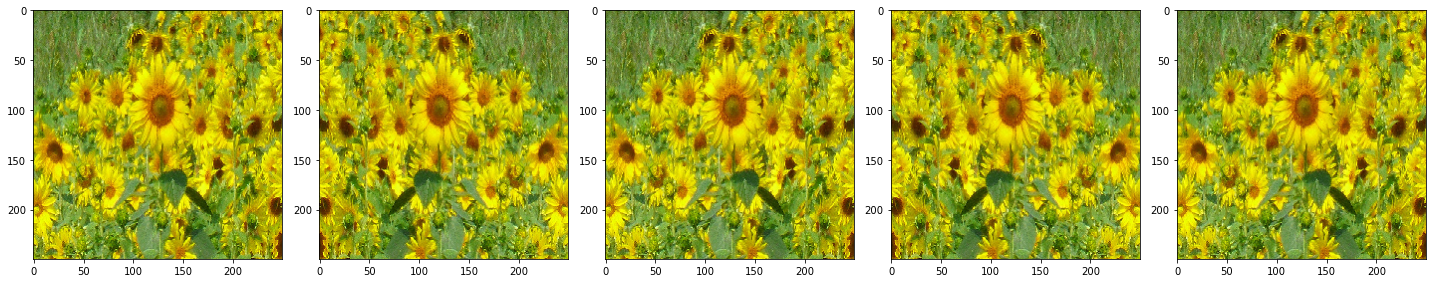

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images[:5])

In [11]:
# apply Random rotation
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(IMG_SHAPE,IMG_SHAPE), shuffle=True)

Found 3670 images belonging to 5 classes.


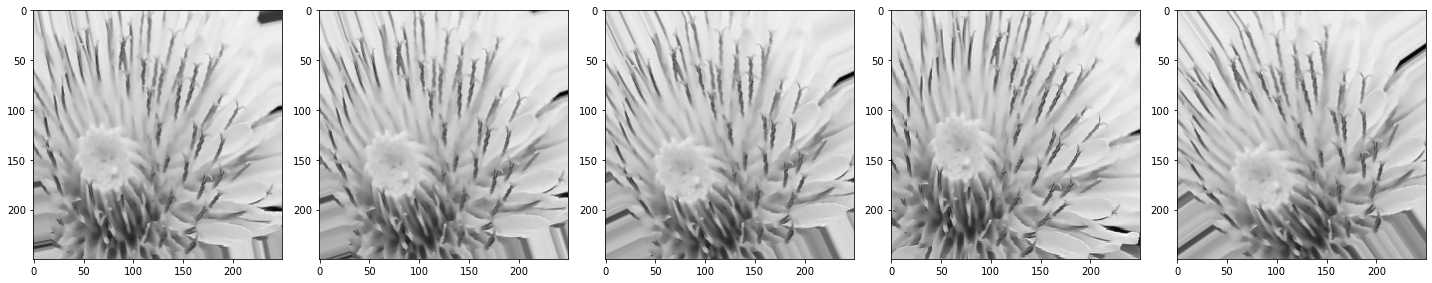

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [13]:
#apply zoom 50%
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, shuffle = True, target_size=(150,150), directory=train_dir)

Found 3670 images belonging to 5 classes.


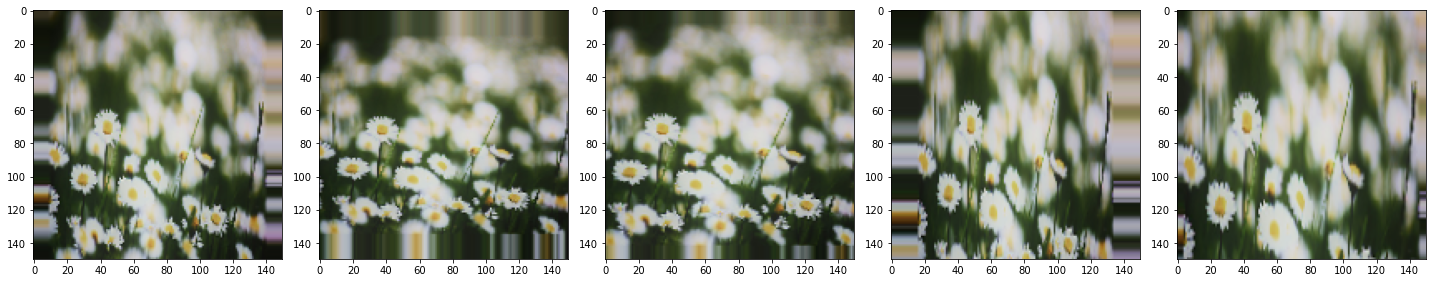

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Put It All Together
In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

random 45 degree rotation

random zoom of up to 50%

random horizontal flip

width shift of 0.15

height shift of 0.15

Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to sparse.

In [21]:
image_gen_train = ImageDataGenerator(rescale = 1./255, width_shift_range=0.15, height_shift_range=0.15, zoom_range=0.5,rotation_range=45)


train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, directory = train_dir, target_size = (150,150), shuffle= True,  class_mode='sparse')

Found 3670 images belonging to 5 classes.


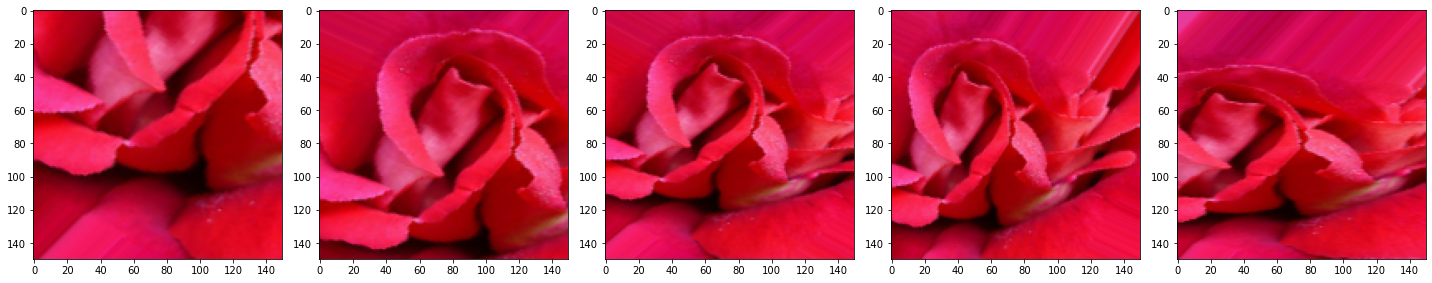

In [22]:
#Visualizing the data
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

# Create a Data Generator for the Validation Set
Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the .flow_from_directory method to apply the above transformation to the images in our validation set. Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse. Remember that it is not necessary to shuffle the images in the validation set.

In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='sparse', directory=val_dir)

Found 3670 images belonging to 5 classes.


# Create the CNN
In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a Conv2D layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the softmax activation function. All other layers should use a relu activation function. You should also add Dropout layers with a probability of 20%, where appropriate.

In [28]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape=(150,150,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dropout(0.2))    
    model.add(tf.keras.layers.Dense(units = 512, activation= 'relu'))
    
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units= 5))
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [29]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [31]:
#Training the model
history = model.fit_generator(train_data_gen, epochs = 30, steps_per_epoch=30, validation_data=val_data_gen, validation_steps=8)

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 1.1738 - accuracy: 0.5094

InvalidArgumentError:  Input to reshape is a tensor with 6150400 values, but the requested shape requires a multiple of 20736
	 [[node sequential_2/flatten_2/Reshape (defined at <ipython-input-30-b376a89ecfdb>:2) ]] [Op:__inference_test_function_3042]

Function call stack:
test_function
